In [13]:
# import project_functions
#from project_functions import funcOne
### I tried to do import from another file and was unsuccessful in doing so 
### I have done all my method chaining inside this file and showed my work for trying the projection_function file

import os
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

from pandas_datareader.data import DataReader
from datetime import date # Date & time function

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import pandas_profiling

# Settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')


## Cryptocurrencies: Analyzing the dataset
<p>A cryptocurrency (or crypto currency) is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. It typically does not exist in physical form (like paper money) and is typically not issued by a central authority. Cryptocurrencies typically use decentralized control as opposed to centralized digital currency and central banking systems. When a cryptocurrency is minted or created prior to issuance or issued by a single issuer, it is generally considered centralized. When implemented with decentralized control, each cryptocurrency works through distributed ledger technology, typically a blockchain, that serves as a public financial transaction database.1</p>

<p>Bitcoin, first released as open-source software in 2009, is the first decentralized cryptocurrency. Since the release of bitcoin, over 7,000 altcoins (alternative variants of bitcoin, or other cryptocurrencies) have been created (e.g. ethereum, ripple, litecoin, monero, digitalcash, zcash).<a href="https://en.wikipedia.org/wiki/Cryptocurrency"> according to wikipedia.org</a></p>

<p>I started my project with a database from <a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory"> kaggle.com </a>called "Cryptocurrency Historical Prices" made by SRK. The database consisted of 19 files with stock info dating from 2013 to 2018. One file had a large amount of info on just bitcoin and all the stock market attributes spaning 5 years of historical data. Then there are 18 other files  consisted of random cryptocurrencies with their Open, High, Low, Close, Volume, and Market Cap attributes spaning 5 years of historical data. When trying to work with the large file on bitcoin itself, was very unmanagable as there were too many attributes that were linked to each other (see first heat map in Wrangling.ipynb) and so it was too hard to remove and focus on finding a path forward. I spent many hours trying to find ways forward researching how to break apart finacial data and find anwsers to the volatility of stocks in the market. I ended up coming across a project in <a href="https://learn.datacamp.com/projects/82"> datacamp.com </a> "Exploring the Bitcoin Cryptocurrency Market". When I found this I was like cool I can take this template and make it my own with the data I picked from kaggle.com and adding addtional data I collected from coinmarketcap.</p>
    
<p>However, when I looked at the smaller files within this kaggle dataset it wasn't up todate because they only went to Feb 20th 2018 and there are way more cryptocurrencies out on the market now then since 2018. So I went onto <a href="https://coinmarketcap.com/able" > coinmarketcap.com </a> to find a way to grab upto date data with all the cryptocurrencies on the market and then join the previous data with the new data. So I created some new data csv files which are in the upto date file folder.</p>

I am now going to try and find the volatility of cryptocurrencies in general to find the best ones to work with and then I am going to compare this to other stock market stocks and find out which one is the best to invest in.2
</p>

<p>*<sup>1</sup> <strong>WARNING</strong>: The idea on how to find the volitility of cryptocurrencies was founded on data camp website in which I paid for a subscription and clearly noted in my notes. I have not used other sources other then data camp which is a online data course program. Data camps process was an easy process to follow and it really helped me anwser my research question since we really never covered finicial data in our data course. I used the steps to this process of anaylizing the data to better help me understand my project and I change 100% of the graphs to be cleaner and in seaborn sns.boxplot. So all this code is my code when it comes to the graphs. I also did my own analyzing to each section of the steps with a data set I used and not their data set that they had on their course project. The outcomes are different in many ways even though some of the cryptocurrencies still showed similar attributes. When I say there are many differences between what they got and what is in my project is mainly because I updated the dataset using coin market cap website and used a kaggle dataset that was picked at the begining of the project. There are also addiontal graphs and structure to my analyzing to better see what is happening in each stage.</strong>*</p>

<p>*<sup>2</sup> <strong>WARNING</strong>: this is not advice and is just a project <strong>Please do not mistake this for investment advice</strong>. *</p>






<p> I am going to read in the data and select rank and market cap columns to find how many lines there are in the dataset</p>

In [14]:
# Reading and loading data
crypto_currancy = pd.read_csv('c:/School/Data301/course-project-solo_334/solo project/data/raw/Cryptocurrency uptodate files/crypto_currency_index.csv')

# Selecting the 'Rank', 'Name', 'Market_Cap' and 'Size' columns
market_cap_raw = crypto_currancy[['Rank','Name','Market_Cap', 'Size']]

# Counting the number of values
market_cap_raw.count().head()

Rank          3685
Name          3685
Market_Cap    3685
Size          3685
dtype: int64

### Data set analyzing
<p> This tells me that there is 3685 data rows for each column</p> 

### We first want to do a little cleaning on the data
<p>We do not need to look at cryptocurrencies that have zero market capialization as they are not relivent for this project. </p>

In [15]:
# Filtering out rows that have zero market capitalization
cap = market_cap_raw.query('Market_Cap >0')

# Counting the number of values again
cap.count()


Rank          2265
Name          2265
Market_Cap    2265
Size          2265
dtype: int64

### Analyzing the Data set 
<p> This tells me that there is now 2265 data rows for each column after I took out the cyrptocurranies that have zero market capitalization</p> 

### Lets try and find the top 10 cryptocurrencies on the market today
<p> We know that Bitcoin is one of the top coins but I have no idea what other coins are on the market and how big or little they are comparaed to bitcoin. Lets look at the top ten and plot a bar graph using seaborn to find out which ones are in the top 10.</p>

In [16]:

plt.figure(figsize=(8,5))

# Selecting the first 10 rows, setting index to Rank, and Calculating Market_Cap_Percent using method chaining and lambda
cap10 = (cap[:10].set_index('Rank').assign(Market_Cap_Percent = lambda x: (x.Market_Cap / cap.Market_Cap.sum())*100)) 

cap10



,Name,Market_Cap,Size,Market_Cap_Percent
Rank,,,,
1,Bitcoin,2.957910e+11,large,62.093405
2,Ethereum,5.077184e+10,large,10.658188
3,Tether,1.787840e+10,large,3.753091
4,XRP,1.222235e+10,large,2.565756
5,Chainlink,4.757927e+09,large,0.998800
6,Bitcoin Cash,4.482952e+09,large,0.941076
7,Litecoin,4.103576e+09,large,0.861436
8,Binance Coin,3.988658e+09,large,0.837312
9,Polkadot,3.847021e+09,large,0.807579


<Figure size 576x360 with 0 Axes>

### Analyzing the Data set 
<p> This tells me which are the top ten cryptocurrencies on the market based on their Market Cap</p> 

<AxesSubplot:xlabel='Name', ylabel='Market_Cap_Percent'>

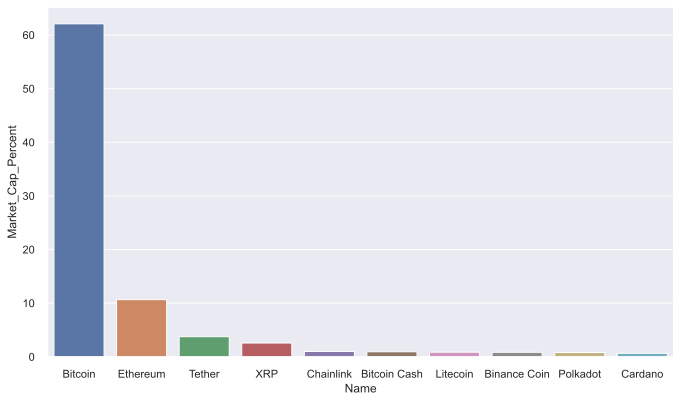

In [17]:
sns.set_theme()
#setting plot fig size
plt.figure(figsize=(10,6))
#ploting graph in sns barplot
sns.barplot(x = 'Name', y='Market_Cap_Percent', data= cap10)

### Analyzing the Data set 
<p> This shows me vizualy that the top ten cryptocurrencies on the market based on their Market Cap</p> 

### Using out guildlines from class lets make this graph better
<p> We know that graphs are harder to read when the scale is so large it makes comparing data more difficult. So lets use log 10 to see if we can scale the graph to give us a better representation of the data on the top 10 currencies.

Also lets color the coins that have relationships and grey out the rest. The currencies that are similar are bitcoin and bitcoin-Cash as its a fork to bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a>. Then we have Ethereum and Cardano which offer <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>1
    
    
We want to follow the Colour & Accessibility guidelines so that we can be informatative for aesthetics/style/ design. However, colour can also be distracting if used inappropriately or poorly as per our class learning on making graphs better.
    
The coloring is basic as there are many kinds of cryptocurriences out there. Some are connected while others are not. Some are set up to stablize bigger curriences and so on. I don't touch on this as the main goal to this project is just to look at what ones are volitile and which ones are the best to invest in. </p>

<p>*<sup>1</sup> <strong>WARNING</strong>: this part about relationships between different cryptocurrencies was found in data camps analyzing as well and I am pointing out that they included the fact that some cryptocurrencies are similar in nature and there for is not my own opinion</strong>. *</p>

Text(0, 0.5, 'USD $')

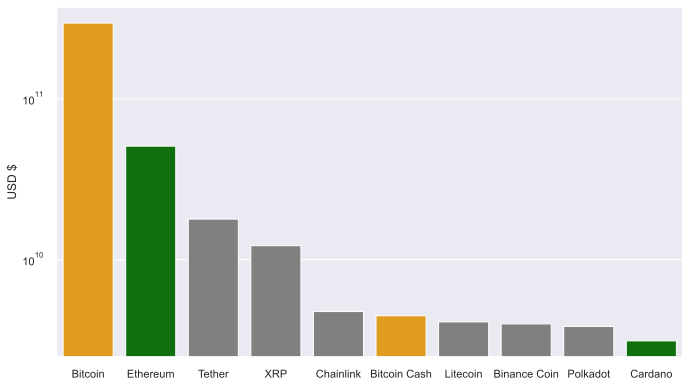

In [18]:
cap10= cap[:10].set_index('Rank')
#setting fig size
plt.figure(figsize=(10,6))
#setting palette colors
COLORS = ['orange', 'green', 'grey', 'grey', 'grey', 'orange', 'grey', 'grey', 'grey', 'green']
#ploting cap10 graph in sns barplot
cap10= (sns.barplot(x = 'Name', y='Market_Cap', data= cap10, palette =COLORS).set_yscale("log"))#setting yscale to log
#setting xlable to nothing
plt.xlabel("")
#setting ylable to USD $
plt.ylabel("USD $")

### Analyzing the Data set 
<p> This better represents vizualy the top ten cryptocurrencies on the market based on their Market Cap using log 10 to display their USD Dollar figure and the scale and colour make a big difference in the representation of the data.</p> 

### One of my research questions is about Volatility in cryptocurrencies
<p> so I want to take the data I have and see what is volatile and what is more stable on the market if there is any stable currencies. We know that most cryptocurrencies are not stable and very volatile but is there a calculated risk that can be taken when looking at these kinds of stocks?</P>

In [2]:
# Selecting the Rank, name, percent_24h and percent_7d columns
volatility = crypto_currancy[['Rank','Name','precent_24h','precent_7d']]

# Setting the index to 'Rank' and dropping na rows
volatility = volatility.set_index('Rank').dropna()

# Sorting the volatility by percent_24h in ascending order
volatility_24h = volatility.sort_values('precent_24h')


NameError: name 'crypto_currancy' is not defined

### Top 10 Losers

In [20]:
#displaying the top losers
volatility_24h.head(10)

,Name,precent_24h,precent_7d
Rank,,,
3284,Electronero,-99.01,-100.00
2257,Pamp Network,-96.87,-97.46
3415,Defi,-92.64,-84.10
2302,Streamit Coin,-91.69,-31.28
3497,Satoshivisioncoin,-90.27,-80.26
2186,CustomContractNetwork,-89.17,-34.21
1879,PopularCoin,-88.02,41.42
3400,IOV BlockChain,-85.73,-85.50
1555,Uniform Fiscal Object,-85.64,0.00


### Analyzing the Data set 
<p> This tells me which currencies are the top 10 most volitile lossers in the negative out of the data set based on the precent difference by 24 hours. It looks like Electronero is the biggest but not by huge difference compared to the other losers</p> </p> 

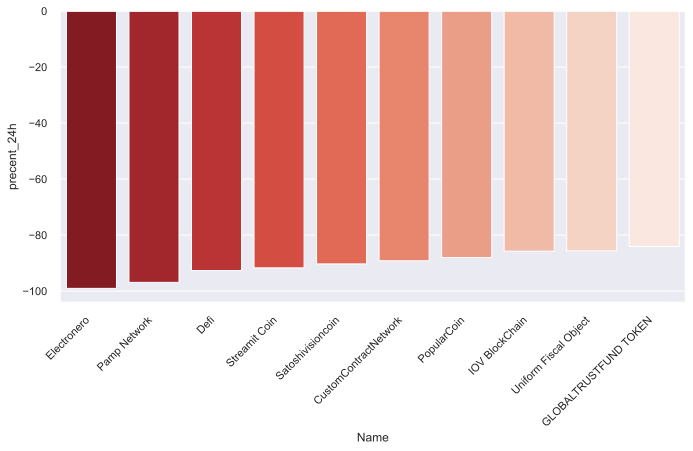

In [23]:
#setting fig size
plt.figure(figsize=(10,5))

#df losers and ploting bar plot in sns 
losers=(sns.barplot(x = 'Name', y='precent_24h', data= volatility_24h.head(10),  palette ="Reds_r").set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right'))
#setting the loser xlables to be horizontal so that we can see the names clearly using chaining method
#losers.set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right')

### Analyzing the Data set 
<p> This visually shows me what the top 10 most volitile loosers look like in the data set based on the precent difference by 24 hours. As you can see there isn't much of a defference in the top 10 losers, as they all seem similar and is with in a narrow range of difference </p> 

### Top 10 Winners

In [1]:
#displaying the top winners 
volatility_24h.tail(10)

NameError: name 'volatility_24h' is not defined

### Analyzing the Data set 
<p> This tells me which currencies are the top 10 most volitile winners in the positive out of the data set based on the precent difference by 24 hours. It looks like FUTURAX has a 1588.70 % increase which is a huge change from the losers.</p> 

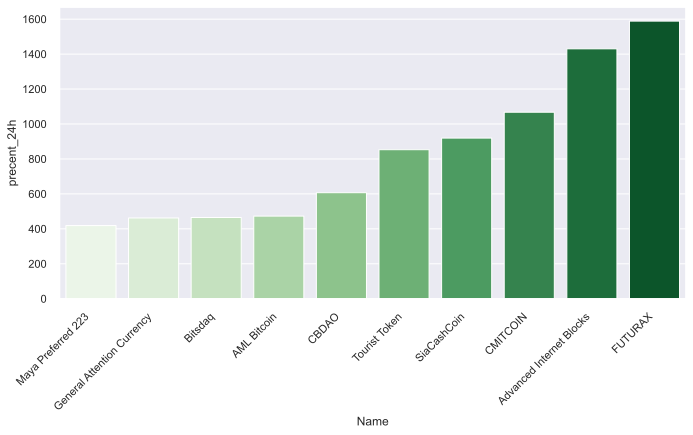

In [26]:
#setting the fig size
plt.figure(figsize=(10,5))

#df winners and showing sns barplot
winners=(sns.barplot(x = 'Name', y='precent_24h', data= volatility_24h.tail(10),  palette ="Greens" ).set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right'))
#setting the xlabels to horizontal to better read them using chaining method
#winners.set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right')


### Analyzing the Data set 
<p> This visually shows me what the top 10 most volitile winners look like in the data set based on the precent difference by 24 hours. As you can see there is a hugh difference in the top 10 winners, as they range between 400-1600% increase.</p> 

### There is a big spread lets look at the graphs side by side 
<p>Since there is a big spread in the data lets try and show this data side by side so that we can get a better visual graph of this data. </p>

Text(0.5, 0, ' ')

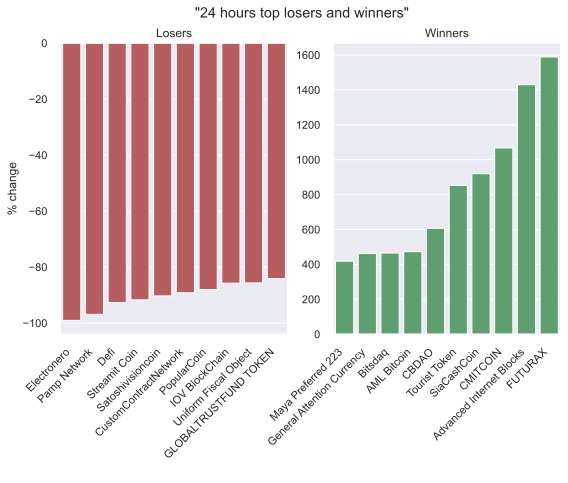

In [27]:
#I tried method chaining the plot with the set xticklables together and had major issues displaying the graph so i left this line by line.
#setting up fig and ax size to subplots
fig, ax = plt.subplots(1,2, figsize=(8, 5))

#setting subtitle
fig.suptitle('"24 hours top losers and winners"')

#setting left plot title
ax[0].set_title('Losers')

#setting right plot title
ax[1].set_title('Winners')

#df losers and ploting sns barplot for 24hr
losers= sns.barplot(x = 'Name', y='precent_24h', data= volatility_24h.head(10),color="r", ax=ax[0])

#setting losers xlabel to horizontal to better read the names
losers.set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right')

#setting ax left graph ylabel name
ax[0].set_ylabel('% change')

#setting ax left graph x label to nothing
ax[0].set_xlabel(" ")

#df winners and ploting sns barplot for 24hr
winners= sns.barplot(x = 'Name', y='precent_24h', data= volatility_24h.tail(10),color="g",ax=ax[1])

#setting winners xlabel to hortizontal to better read names
winners.set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right')

#settomg ylabel on right graph to nothing
ax[1].set_ylabel('')

#setting xlabel on right graph to nothing
ax[1].set_xlabel(" ")

### Analyzing the Data set 

<p>This visually shows me the two graphs side by side to show a comparison on the top losers and winners. It gives a great visual for everyone to see that they are very volatile and which ones are the most volatile regardless of whether its positve or negative. It also shows you that the main cryptocurrencies are not in this list and the reason why is they are mostlikely much larger and that they are more stable in the market. There is a 1600% daily increase difference in the positive and only at 15% daily decrease difference in the negative</p>

### Is there a difference in the cryptocurrencies on the weekly data
<p> Now that we have looked at the daily difference in volitity lets try and see if the stocks that are in the daily losers and winners are the same or different.</p>

### Top 10 Weekly Losers

In [28]:
#setting up the weekly losers and winners by resorting the data 
volatility_7d = volatility.sort_values('precent_7d')
#showing the top 10 weekly losers
volatility_7d.head(10)

,Name,precent_24h,precent_7d
Rank,,,
3284,Electronero,-99.01,-100.00
2228,FundRequest,-2.73,-98.60
2241,Cryptrust,-37.80,-97.74
2257,Pamp Network,-96.87,-97.46
2918,Defi Shopping Stake,21.57,-97.30
3097,Fee Active Collateral Token,-23.10,-97.26
1467,Infinitecoin,-3.55,-96.35
2810,Nyan Finance,51.86,-95.94
2131,Jupiter,-0.70,-93.56


### Analyzing the Data set 

<p>This shows me what the me what the top 10 losers are for the weekly precentage change and it looks like there are only two that are the same. Electronero and Pamp network from the 24 hour chart. If you look at the rank they are mostly at the bottom which means they are very small cryptocurrencies. </p>

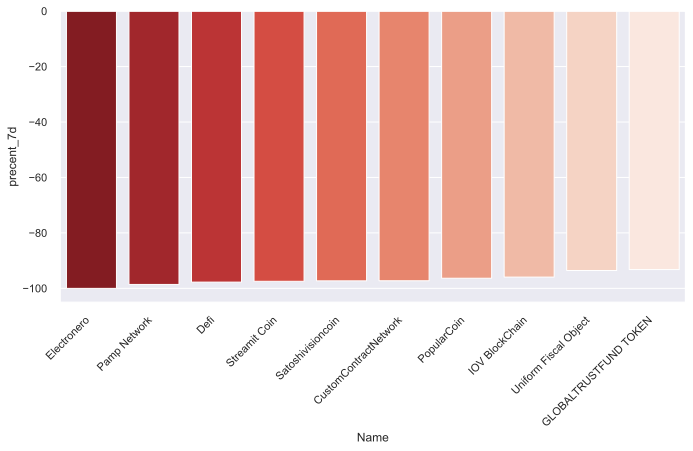

In [29]:
#setting up fig size 
plt.figure(figsize=(10,5))

#df losers using sns barplot
losers=(sns.barplot(x = 'Name', y='precent_7d', data= volatility_7d.head(10),  palette ="Reds_r").set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right'))
#setting the xlable to horizontal to better read the names using chaining method
#losers.set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right')

### Top 10 Weekly Winners

In [30]:
#showing the to 10 weekly winners
volatility_7d.tail(10)

,Name,precent_24h,precent_7d
Rank,,,
474,HOMIHELP,13.80,835.95
1263,SiaCashCoin,919.40,925.19
3555,KingXChain,-0.77,1114.74
2250,FUTURAX,1588.70,1495.03
3556,YUKI,-0.75,1707.94
1343,EOS TRUST,-0.80,1708.29
3564,CMITCOIN,1067.44,1717.74
1171,W Green Pay,-2.47,1825.05
1224,Iconic Token,-13.23,2410.12


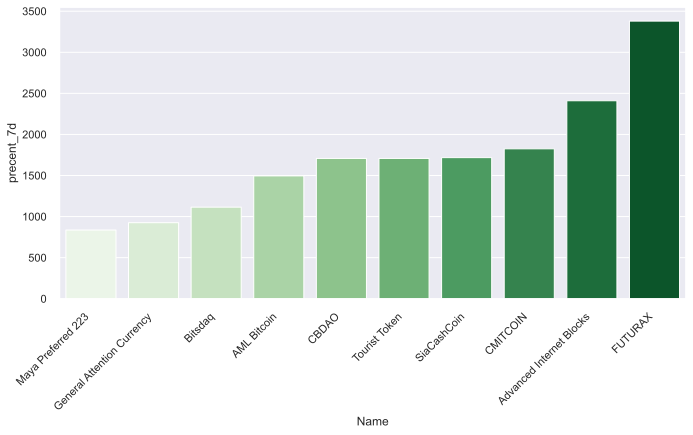

In [31]:
#setting up the fig size
plt.figure(figsize=(10,5))

#df winners and setting up the sns barplot
winners=sns.barplot(x = 'Name', y='precent_7d', data= volatility_7d.tail(10),  palette ="Greens" ).set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the xlables to horizontal to better read the names using chaining method
#winners.set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right')

### Analyzing the Data set 

<p>This shows me what the me what the top 10 winners are for the weekly precentage change and it looks like there are only three that are the same. SiaCashCoin, Futurax and CMITCOIN from the 24 hour chart. If you look at the rank they are mostly at the still near the bottom which means they are still very small cryptocurrencies and none of the big currencies are included in this graph. </p>

### Putting together the two graphs to better understand the data
<p> We have seen the graphs seperately and now lets look at them side by side to see what is happening in the weekly Losers and Winners. Lets see how big of a difference there is given more time for volitily to stablize in a weekly setting. Right now Futurax is very attractive and looks good but as you know its not stable so investing in it might be very risky.</p>

Text(0.5, 0, ' ')

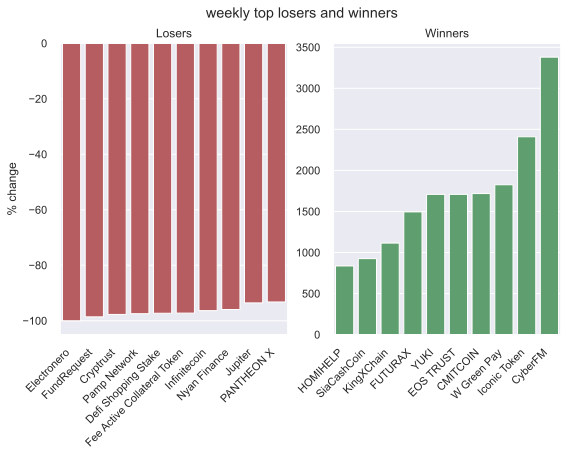

In [32]:
#settin the fig and ax size
fig, ax = plt.subplots(1,2, figsize=(8, 5))
#setting the subtile up
fig.suptitle('weekly top losers and winners')
#setting up the titles for both graphs
ax[0].set_title('Losers')
ax[1].set_title('Winners')
#df losers and ploting the sns barplot
losers= sns.barplot(x = 'Name', y='precent_7d', data= volatility_7d.head(10),color="r", ax=ax[0])
#setting up the xlables to horizontal to better read the names
losers.set_xticklabels(losers.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting up the y and x label on the losers graph
ax[0].set_ylabel('% change')
ax[0].set_xlabel(" ")
#df winners and ploting the sns barplot
winners= sns.barplot(x = 'Name', y='precent_7d', data= volatility_7d.tail(10),color="g",ax=ax[1])
winners.set_xticklabels(winners.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting up the y and x lables for winners graph
ax[1].set_ylabel('')
ax[1].set_xlabel(" ")

### Analyzing the Data set 

<p>This visually shows me the two graphs side by side to show a comparison on the top 10 weekly losers and winners. It gives a great visual for everyone to see that even though its a weekly percentage change they are still very volatile. The  ones are the most volatile regardless of whether its positve or negative are still small currencies. The increase has diffently changed and is now close to a 3500% increase. If you look Futurax is now number 4 on the graph and is very small compared to cyberFM. I find that interesting but again this also shows you that the main cryptocurrencies are not in this list and the reason agaim why is they are most likely much larger and that they are more stable in the market. </p>

## How small are these stocks and what is considered small for the cryptocurrency market?
<p>I have never heard of any of these cryptocurrencies above. We can see that there is a significent change in percentage change from 1 to 7 days. The smaller the stock the bigger the risk or reward but it is also very volitile when its small and less stable.</p>

<p>What Does Large Cap (Big Cap) Mean? 
Large cap (sometimes called "big cap") refers to a company with a market capitalization value of more than $10 billion. Large cap is a shortened version of the term "large market capitalization." Market capitalization is calculated by multiplying the number of a company's shares outstanding by its stock price per share. A company’s stock is generally classified as large cap, mid cap or small cap.</p>

<p>Lets look at the large ones for a minute. We will take everything bigger then 10 billion in market cap and see which stocks it tells us are that large.</p>

### Lets try and categorize the cryptocurrencies into large, medium, and small stocks
<p> I want to be able to see which ones are in the different categories so that we can figure out the comparison of the groups.</p>

<p>What Does Large Cap (Big Cap) Mean? <a href="https://www.investopedia.com/terms/l/large-cap.asp#:~:text=Large%20cap%20%28sometimes%20called%20%22big%20cap%22%29%20refers%20to,shortened%20version%20of%20the%20term%20%22large%20market%20capitalization.%22"> Definition<a/> </p>
Large cap (sometimes called "big cap") refers to a company with a market capitalization value of more than $10 billion. Large cap is a shortened version of the term "large market capitalization." Market capitalization is calculated by multiplying the number of a company's shares outstanding by its stock price per share. A company’s stock is generally classified as large cap, mid cap or small cap.</p>

In [33]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query("Market_Cap > 1E+10")

# Printing out largecaps
largecaps

,Rank,Name,Market_Cap,Size
0,1,Bitcoin,2.957910e+11,large
1,2,Ethereum,5.077184e+10,large
2,3,Tether,1.787840e+10,large
3,4,XRP,1.222235e+10,large


### Analyzing the Data set 

<p>This shows the cryptocurrencies that are above the 10 billion dollar market cap and are considered large caps according to the deffintion. It looks like the 4 are the major players in the market. I wonder if these stocks are the ones that are going to be best to invest in and have a better risk to reward ratio. </p>

Text(0.5, 0, ' ')

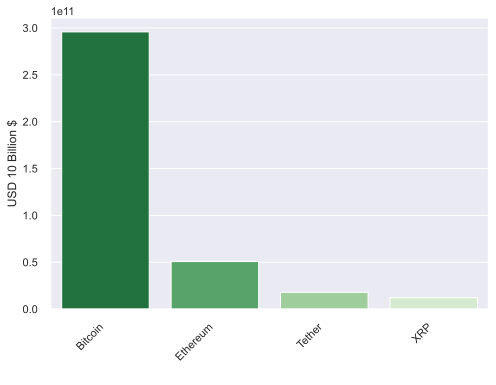

In [34]:
#setting the fig size
plt.figure(figsize=(7,5))
#df large and ploting the sns barplot
large=sns.barplot(x = 'Name', y='Market_Cap', data= largecaps,  palette ="Greens_r" )
#setting the xlable to horizontal to better read names
large.set_xticklabels(large.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting up the x and Y label 
large.set_ylabel('USD 10 Billion $')
large.set_xlabel(" ")

### Analyzing the Data set 

<p>This visually displays the currencies that are above the 10 billion dollar market cap and it gives a good representation on how big bitcoin is to the other 3 top cryptocurrencies. As you can see there is a large gap in between bitcoin and the 3 others.</p>

### Lets look at the medium sized ones

<p> lets see which ones are considered medium sized between 1 billion in market cap to 10 billion in market cap. I also want to quickly look at where they are ranked to see if they are higher in the ranks.</p>

In [35]:
# Selecting everything less than 10 billion and more then 1 billion
medium = cap.query("1E+10 > Market_Cap > 1E+9").sort_values('Market_Cap',ascending=False)

# Printing out largecaps
medium

,Rank,Name,Market_Cap,Size
4,5,Chainlink,4.757927e+09,large
5,6,Bitcoin Cash,4.482952e+09,large
6,7,Litecoin,4.103576e+09,large
7,8,Binance Coin,3.988658e+09,large
8,9,Polkadot,3.847021e+09,large
200,201,HEX,3.642006e+09,large
9,10,Cardano,3.127773e+09,large
10,11,Bitcoin SV,2.868014e+09,large
11,12,USD Coin,2.813598e+09,large
12,13,EOS,2.342491e+09,large


### Analyzing the Data set 

<p>This shows the currencies that are between the 10 billion dollar and 1 billion dollars in market cap and would be considered medium sized stock market companies.You can see that there are 24 cryptocurrencies in this category and they are mostly in the higher ranks with the lowest ones being in the rank range of 200ish.</p>

Text(0.5, 0, ' ')

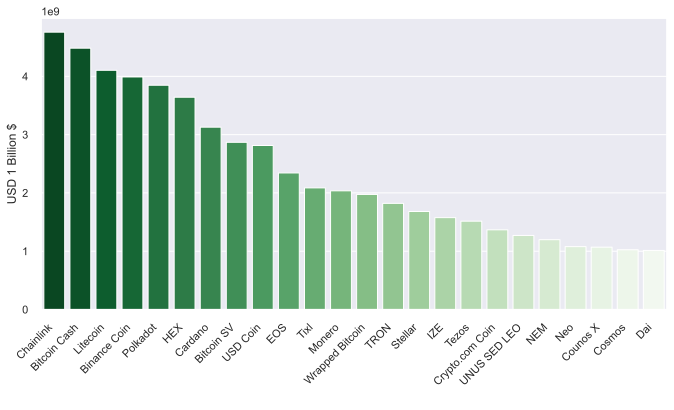

In [36]:
#setting up the fig size
plt.figure(figsize=(10,5))
#df medium and ploting sns barplot
medium=sns.barplot(x = 'Name', y='Market_Cap', data= medium,  palette ="Greens_r" )
#setting the xlabel to horizontal to better read the names
medium.set_xticklabels(medium.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the y and xlabels
medium.set_ylabel('USD 1 Billion $')
medium.set_xlabel(" ")

### Analyzing the Data set 

<p>This visually displays the currencies that are  between the 1 billion dollar and 10 billion dollars in market cap and it gives a good representation on how they really start to tapper off as they get smaller. I used a green scale color to really highlight that they are getting smaller and smaller in this graph. </p>

### How many are really small
<p> I want to see how many are smaller and just how small they go. I won't graph it as there will be to many to graph but we should be able to see which ones are the smallest ones.</p> 

In [38]:
# Selecting everything less than 1 billion 
small = cap.query("Market_Cap < 5E+7")

# Printing out small
small


,Rank,Name,Market_Cap,Size
141,142,Stratis,49056202.0,small
142,143,Unibright,48577983.0,small
143,144,Hive,48007718.0,small
144,145,Wanchain,48193890.0,small
145,146,Ankr,48360040.0,small
...,...,...,...,...
2260,2357,QYNO,343.0,small
2261,2358,Dystem,205.0,small
2262,2359,HarmonyCoin,179.0,small
2263,2360,Innovative Bioresearch Classic,105.0,small


### Analyzing the Data set

<p>This shows the currencies that are below 1 billion in market cap and you can see in the top 5 they start off realitvely large and in the bottom 5 they get extremely small. I find it interesting that they are as small as 32 dollars in market cap. I also find it interesting that the rank of some of these are higher then the ones in the medium category as they go into the 140 range in rank.</p>

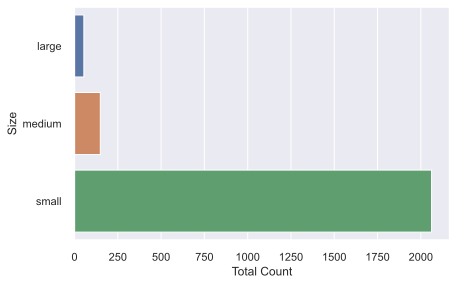

In [39]:
#df large getting query on data between numbers then counting how many fall in that area and then ranking them
large= cap.query("Market_Cap > 3E+8").count().rank;
#df medium getting query on data between numbers then counting how many fall in that area and then ranking them
medium= cap.query("Market_Cap >= 5E+7 & Market_Cap < 3E+8").count().Rank
#df small getting query on data between numbers then counting how many fall in that area and then ranking them
small= cap.query("Market_Cap < 5E+6").count().Rank

#df total count and then ploting sns countplot 
totalcount= (sns.countplot(y='Size',data=cap).set_xlabel('Total Count'))#setting xlable to total count



### Analyzing the Data set and conclusion for volitility of Cryptocurrencies

<p>This visually displays the currencies compared to each other and we see that there are very small amount of large and medium currencies to the really small ones. It shows me that the data we used to analyze the volitility of the cryptocurrencies is not enough as most of the ones we came across were every small and highly volitile in nature. We want to try and find ones that we can weigh the investment risk to and having highly volitile small currencies will most likely give us a not so good representation of investing in cryptocurrencies. So for now I think its fair to take the top 5 cryptocurrencies and figure out from those 5 which ones are the best to try and see if they are still to risky compared to other benechmarks. When I talk about benchmarks I talk about comparing the top 5 to other stocks to weigh the risk and reward of an investment. Now from what is online investors say that cryptocurrencies are very hard to compare to other stocks due to their volitility but they say that the most likely one you can compare it to are commodities like gold. </p>

### The Sharpe Mathod
<p>When I ended up coming across data camp I was also able to find a project called <a href="https://learn.datacamp.com/projects/66">"Risk and Returns: The Sharpe Ratio"  </a>. This project helped me try and figure out with my own dataset if there was a way to explore the risks of buying cryptocurrencies and what the rewards where if you found the right cryptocurrency to invest in.</p>

<p>To invest in stocks is risky on its own and especially if you don't know what stocks to invest in. Some people might go to an investment firm and get them to invest for you. Others might take a shot and invest in random stocks under a gut feeling. But to invest in a stock and have a good understanding of the risk to reward is important and there are methods to do this. One of the methods is called the sharpe method and it was founded by professor William Sharpe. Shape wanted to figure out "How does one compare differrent investments that may deliver simlar results on average, but exhibit different levels of risk?</p>

<p>I wanted to look at this method and figure out which cryptocurrency is better to invest in and which ones have higher riskes associated with them. Since investors say that the only comparable is commodities like gold I am going to take a gold stock that has similar market cap to the top 5 cryptocurrencies and see if that is a good comparable. I am also going to use the S&P 500 which is a portfolio of the top 500 stock companies as another benchmark. I am going to do this as it is what would be the better choice when using the sharpe method but it might not work out to be comparable for cryptocurrencies since they are kind of a weird stock in the market. </p>

<p><a href="https://learn.datacamp.com/projects/66">A short background on:</a> Sharpe was one of the originators of the capital asset pricing model (CAPM). He created the Sharpe ratio for risk-adjusted investment performance analysis, and he contributed to the development of the binomial method for the valuation of options, the gradient method for asset allocation optimization, and returns-based style analysis for evaluating the style and performance of investment funds.The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We are using a simplified method for this example when using crytpocurrency stocks. We will use a gold stock and the S&amp;P 500 as the two benchmarks rather than the risk-free interest rate because both are easily aceessable at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the <a href="https://fred.stlouisfed.org/series/TB3MS">3-month Treasury Bill Rate</a>.1 </p>

<p>*<sup>1</sup> <strong>WARNING</strong>: This idea was taken from data camp "The sharpe ratio" and was modified and expanded on using gold stocks and upto date data as this is mostly a mathimatical process. The difference in what my project is compared to data camps is the stocks data camp used was Amazon and Facebook. I am not using either of those stocks and so all of my graphs and analyzing is completely different then theirs. The gold stock I picked is specific to my data set and the market cap ratio and this would be similar to what investors and stock market analyst use daily when weighing the risks and returns to stocks. The sharpe method is a common method and in no way am I saying that my work below is orginal when it comes to math but the orginallity is the use of gold benchmarks and the data set I used so that I could get outcomes for my project and are very different then the project on data camp. I have also changed the graphs to be much more readable and have much more effect then what was used on data camps project</strong>. *</p>



In [40]:
# loading and reading in the top 5 crypto currencies for 1 year of data starting Nov 17th 2019 to Nov 17th 2020
crypto_price = pd.read_csv('c:/School/Data301/course-project-solo_334/solo project/data/raw/Cryptocurrency uptodate files/Top_5_Crypto_1_year.csv', 
    parse_dates=['Date'], #parsing the dates
    index_col='Date'
    ).dropna() #dropping the na values


<AxesSubplot:>

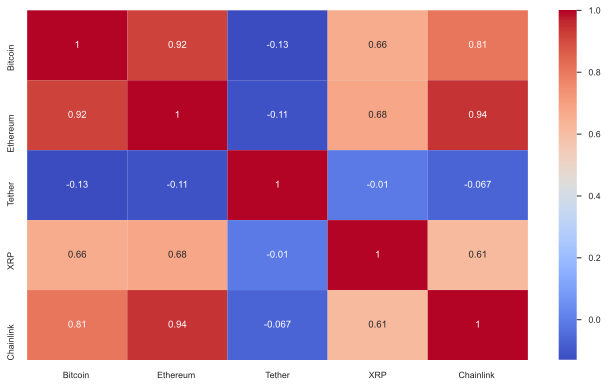

In [41]:
#sizing the plot
plt.figure(figsize=(10,6))
#setting the style and font scale
sns.set_context('paper', font_scale=1)

#making a corraltion map to see which ones are highly corrilated
crypto_map =crypto_price.corr()

#ploting the heatmap
sns.heatmap(crypto_map, annot=True, cmap='coolwarm')

### Analyzing the Data set 

<p>This visually displays any corrilations in the data set and we can see that there is some with Ethereum and bitcoin, and also some with Ethereum and Chainlink.</p>

## A first look at the data
<p>I want to first look at the data to see what it consist of</p>

In [42]:
# show head and info for crypto_price
print('Cryptocurrency Price\n')
crypto_price.info()

crypto_price.head()

Cryptocurrency Price

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2020-11-15 to 2019-11-15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bitcoin     367 non-null    float64
 1   Ethereum    367 non-null    float64
 2   Tether      367 non-null    float64
 3   XRP         367 non-null    float64
 4   Chainlink   367 non-null    float64
dtypes: float64(5)
memory usage: 17.2 KB


,Bitcoin,Ethereum,Tether,XRP,Chainlink
Date,,,,,
2020-11-15,15955.58789,447.559082,1.000647,0.269642,12.121813
2020-11-14,16068.13867,460.149841,1.000288,0.268342,12.576960
2020-11-13,16317.80859,474.626434,1.000345,0.265191,12.887979
2020-11-12,16276.34375,461.005280,1.000509,0.254903,12.423223
2020-11-11,15701.33984,462.960541,1.000985,0.256259,12.807538


### Analyzing the Data set 

<p>This tells us that we 5 columns that have the closing price on the top 5 cryptocurrencies and it lists the first 5 rows of data.</p>

## The daily prices for the top 5 cryptocurrencies
<p>I want to see the data graphed out in a plot first</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,9443.221348,250.918902,1.002035,0.225581,6.059756
std,2103.547288,99.858012,0.004773,0.037452,4.266945
min,4970.788086,110.605873,0.974248,0.139635,1.741144
25%,7765.231445,166.600266,1.000262,0.195508,2.685424
50%,9303.629883,228.194870,1.001419,0.223672,4.089671
75%,10682.633300,353.176605,1.003101,0.249244,9.707786
max,16317.808590,477.051910,1.053585,0.334822,19.098751


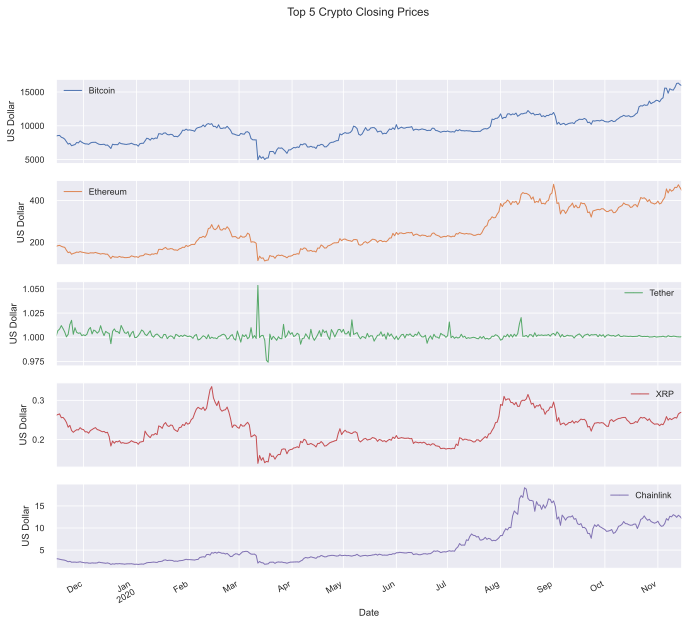

In [43]:
#from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# ploting the crypto_price

crypto_price.plot(title='Top 5 Crypto Closing Prices',ylabel ="US Dollar", marker='.',linestyle='-',linewidth=1, markersize=1, subplots=True)
#plt.ylabel('US Dollar');
# displaying the crypto_price
crypto_price.describe()

### Analyzing the Data set 

<p>This shows us what the full year looks like in a line graph of the top 5 cryptocurrencies on their closing price. I can see that they are all different but in March you can see that there is a spike in all 5 graphs right around the time COVID-19 hit</p>

### looking at the gold stock
<p> I have gone out and optained one years worth of a comparable gold stock that is similar to the market cap of the top 5 cryptocurries. I now want to look at this data and see what it looks like in a graph.</p>

In [44]:
# Reading and loading in the gold stock data 
gold = (pd.read_csv('c:/School/Data301/course-project-solo_334/solo project/data/raw/Gold stock/GOLD.csv',
parse_dates=['Date'],#parsing the date
index_col='Date').dropna().drop(['Open','High','Low', 'Volume','Adj Close'],axis=1).rename(columns={"Close": "Gold"}))#droping na and columns open, high, low, volume, adj close and then renaming the column to gold

#printing the head()
gold.head()

,Gold
Date,
2019-11-15,16.570000
2019-11-18,16.889999
2019-11-19,17.049999
2019-11-20,16.990000
2019-11-21,16.639999


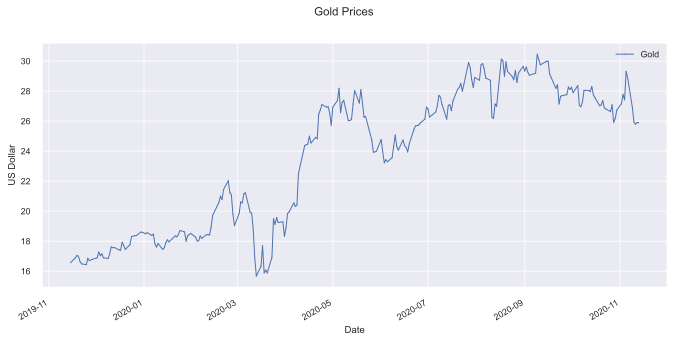

,Gold
count,252.000000
mean,23.683175
std,4.588394
min,15.670000
25%,18.512500
50%,25.265000
75%,27.575000
max,30.459999


In [45]:
# ploting the graph of the gold stock price data
rcParams['figure.figsize'] = 10, 5
gold.plot(title='Gold Prices',ylabel ="US Dollar",marker='.',linestyle='-',linewidth=1, markersize=2, subplots=True)

# Showing the plot
plt.show()

#Describing gold count, mean, std, min, 25%, 50%,75%,max
gold.describe()

### Analyzing the Data set 

<p>This shows us visually the gold stock price on a graph and a discription of the averages below the graph on the years worth of data. Again something that comes to mind when looking at this data is that the stock price wen up in March when COVID-19 hit.</p>

### Looking at the gold stock
<p> I have gone out and optained one years worth of a comparable S&P 500 stock so that I can try and see if it is comparable to the top 5 cryptocurries. I have done this by going online and paying for the live stock through a IEX cloud to benchmark and grab the info vs using csv files. Since we only need one years worth of data we will start the date at november 15th 2019 and end the date at November 15th 2020. I did add a script I found on github that has all the upto data csv files when you run the script it will download current prices for the S&P 500 stock. For now I used the methodd of live stock ticker as I wanted to try and work on this for future reasons. I now want to look at this data and see what it looks like in a graph.</p>

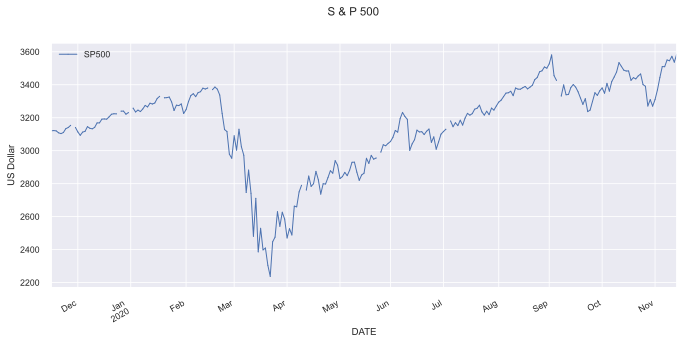

,SP500
count,252.000000
mean,3153.730437
std,269.846321
min,2237.400000
25%,3034.530000
50%,3222.335000
75%,3348.620000
max,3585.150000


In [47]:
# Reading in the benchmark data
rcParams['figure.figsize'] = 10, 5
# Setting a start date
start = date(2019,11,15)
end = date(2020,11,15)

# Setting the series codes
series = 'SP500'
#use the S&P 500 Index from EIX stock market site by paying for and using a key

# Importing the data
SP_data = DataReader(series, 'fred', start, end)


# Plot
SP_data.plot(title='S & P 500',ylabel ="US Dollar",marker='.',linestyle='-',linewidth=1, markersize=2, subplots=True)

# Showing the plot
plt.show()

#describe S&P 500 
SP_data.describe()

### Analyzing the Data set 

<p>This shows us visually the S&P stock price on a graph and a discription of the averages below the graph on the years worth of data. Again something that comes to mind when looking at this data is that the stock price went down in March when COVID-19 hit which is different then with the cryptocurrencies and gold stocks.</p>

### The Sharpe Method: Comparing the daily stock returns for Cryptocurrencies

<p> I am going to attempt to try and use the Sharpe Ratio Method  and calculate the returns between the cryptocurrencies to see if there are investment options to consider. We didn't need all the historical data I had so I narrowed it down in a csv file to only include one years data. I am going to calculate the return by doing a percentage change which is a simple calculation built in.</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,-0.000912,-0.001087,0.000019,0.000746,-0.001410
std,0.043290,0.057041,0.005851,0.042623,0.073310
min,-0.153889,-0.159243,-0.051993,-0.132922,-0.218385
25%,-0.014593,-0.024717,-0.001974,-0.017038,-0.030926
50%,-0.001330,-0.002796,-0.000029,-0.001634,-0.002048
75%,0.011028,0.016344,0.001913,0.015748,0.028560
max,0.591585,0.734522,0.053976,0.490285,0.848874


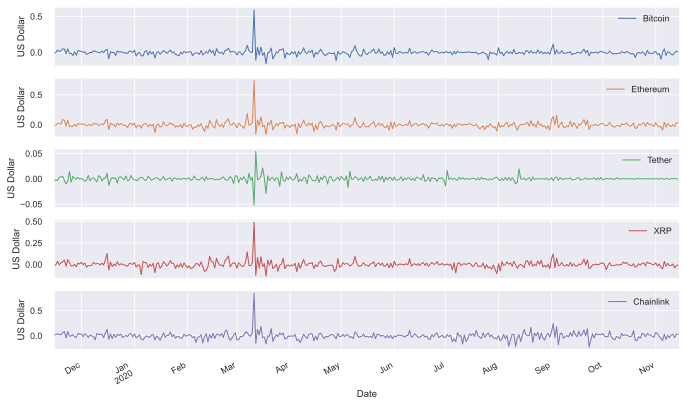

In [48]:
# calculating daily crypto_returns
crypto_returns = crypto_price.pct_change()

rcParams['figure.figsize'] = 10, 7
# plot the daily crypto_returns
crypto_returns.plot( ylabel ="US Dollar",marker='.',linestyle='-',linewidth=1, markersize=1, subplots=True);


# summarize the daily crypto_returns
crypto_returns.describe()

### Analyzing the Data set 

<p>This shows us visually the crytpocurrencies daily stock price returns on a graph and a discription of the averages above the graph on the years worth of data. Again something interesting happening here is that when looking at this data the daily returns all went up in March when COVID-19 hit which isis interesting as I would have suspected that for Bitcoin but I never thught it would be the same for the other 4 stocks.</p>

### The Sharpe Method: Comparing the daily stock returns for Gold stocks

<p> I am going to again use the Sharpe Ratio Method and calculate the returns between the gold prices to see if there are investment options to consider. Again, we didn't need all the historical data I had so I narrowed it down in a csv file to only include one years data. I am going to calculate the return by doing a percentage change which is a simple calculation built in.</p>

,Gold
count,251.000000
mean,0.002237
std,0.030414
min,-0.103331
25%,-0.012113
50%,0.001479
75%,0.018039
max,0.151802


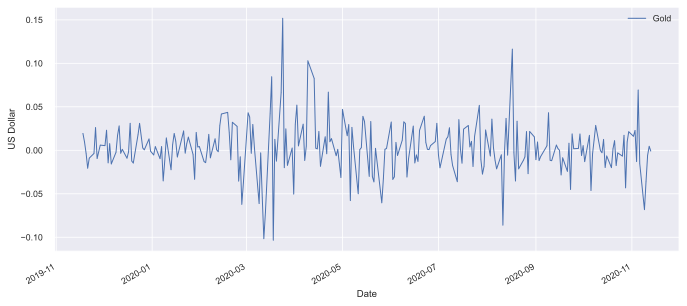

In [49]:
# calculate daily gold_returns
gold_returns = gold.pct_change()

rcParams['figure.figsize'] = 10, 5
# plot the daily gold_returns
gold_returns.plot(ylabel ="US Dollar",marker='.',linestyle='-',linewidth=1, markersize=1)


# summarize the daily gold_returns
gold_returns.describe()

### Analyzing the Data set 

<p>This shows us visually the gold daily stock price returns on a graph and a discription of the averages above the graph on the years worth of data. Again something interesting happening hereis that when looking at this data the gold daily returns went up in March as well when COVID-19 hit, but there is a lot more flucation on the daily returns then on the crytocurrenies which is interesting as I would have suspected that gold was more stable then cryptocurrencies.</p>

### The Sharpe Method: Comparing the daily stock returns for S&P 500

<p> I am going to again use the Sharpe Ratio Method and calculate the returns between the S&P 500 prices to see if there are investment options to consider. Again, we used this using live data from the site mentioned above and now I am going to calculate the return by doing a percentage change which is a simple calculation built in.</p>

count    260.000000
mean       0.000763
std        0.021330
min       -0.119841
25%       -0.005645
50%        0.001857
75%        0.008449
max        0.093828
Name: SP500, dtype: float64

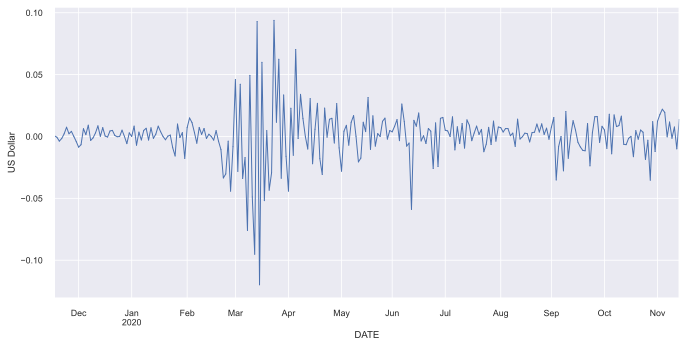

In [50]:
# calculate daily benchmark S&P returns stock returns
sp_returns =SP_data['SP500'].pct_change().dropna()

rcParams['figure.figsize'] = 10, 5
# plotting the daily S&P returns
sp_returns.plot(ylabel ="US Dollar",marker='.',linestyle='-',linewidth=1, markersize=2);

# summarize the daily S&P returns
sp_returns.describe()

### Analyzing the Data set 

<p>This shows us visually the Ss&P daily stock price returns on a graph and a discription of the averages above the graph on the years worth of data. Again something interesting happening here is that when looking at this data the S&P daily returns went up in March as well when COVID-19 hit, but then stablized and seems to look like its much more stable then the gold stock returns but less stable to the Cryptocurrency daily stock returns.</p>

### Sharpe Method for Calculating Excess Returns for Cryptocurrencies vs. Gold

<p> I am going to use the Sharpe Ratio Method and now calculate the excess returns between the cryptocurrencies and gold price to see if there are any preformance on a daily basis we need to consider. I am going to calculate the excess crypto_returns by subtracting gold_returns and droping all na values that might happen which is another very simple step that is built into the code.</p>

,Bitcoin,Chainlink,Ethereum,Gold,Tether,XRP
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.000848,-0.004482,-0.001772,-0.002237,-0.000045,0.000484
std,0.047740,0.080111,0.062567,0.030414,0.006666,0.046000
min,-0.153889,-0.218385,-0.159243,-0.151802,-0.051993,-0.132922
25%,-0.014278,-0.036278,-0.026294,-0.018039,-0.001984,-0.018163
50%,-0.001224,-0.006258,-0.002660,-0.001479,-0.000009,-0.001688
75%,0.010322,0.024168,0.014782,0.012113,0.001921,0.013609
max,0.591585,0.848874,0.734522,0.103331,0.053976,0.490285


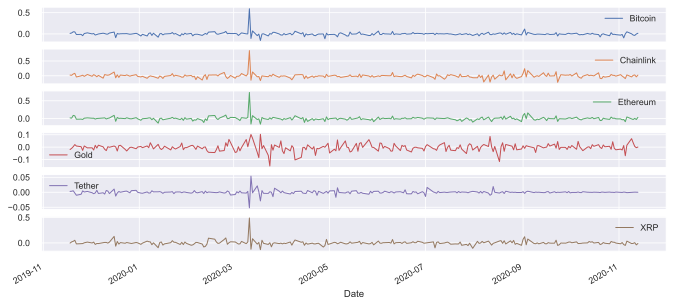

In [51]:
# calculate the difference in daily excess_returns by subtracting gold returns from crypto returns
g_excess_returns = crypto_returns.sub(gold_returns, axis=0,fill_value=0).dropna()

rcParams['figure.figsize'] = 10, 5
# plotting the gold vs cryptocurrency excess_returns
g_excess_returns.plot(kind= 'line',linewidth=1, markersize=1,subplots=True);

# displaying the gold vs cryptocurrency excess_returns
g_excess_returns.describe()

### Analyzing the Data set 

<p>This shows us visually the excess cryptocurrency stock price returns vs gold on a graph and a discription of the averages above the graph on the years worth of data. Again something interesting happening here is that when looking at this data the gold excess returns seems to be all over the place compared to the cryptocurrencies and they seem to look like its much more stable then the gold excess stock returns.</p>

### Sharpe Method for Calculating Excess Returns for Cryptocurrencies vs. Gold

<p> I am going to again use the Sharpe Ratio Method and now calculate the excess returns but now between the cryptocurrencies and S&P 500 prices to see if there are any preformance on a daily basis we need to consider. I am going to calculate the excess crypto_returns by subtracting sp_returns and droping all na values that might happen which is another very simple step that is built into the code.</p>

,Bitcoin,Ethereum,Tether,XRP,Chainlink
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,-0.001695,-0.002548,-0.000801,-0.000391,-0.005235
std,0.050910,0.064663,0.023213,0.049140,0.081609
min,-0.114868,-0.137908,-0.094860,-0.113446,-0.207568
25%,-0.019915,-0.027212,-0.010768,-0.023097,-0.037744
50%,-0.003765,-0.003539,-0.001737,-0.002093,-0.003111
75%,0.011592,0.016201,0.006260,0.015633,0.023288
max,0.640453,0.783390,0.149089,0.539154,0.897743


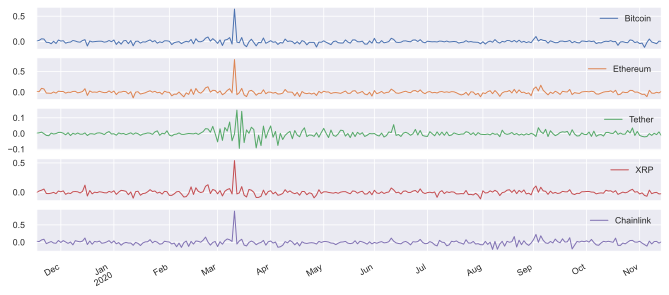

In [52]:
# calculate the difference in daily excess_returns by subtracting S&P 500 returns from crypto returns
excess_returns = crypto_returns.sub(sp_returns, axis=0).dropna()

rcParams['figure.figsize'] = 10, 5
# plotting the S&P 500 vs cryptocurrency excess_returns
excess_returns.plot(kind= 'line',linewidth=1, markersize=1,subplots=True);

# displaying the S&P vs cryptocurrency excess_returns
excess_returns.describe()

### Analyzing the Data set 

<p>This shows us visually the excess cryptocurrency stock price returns vs S&P on a graph and a discription of the averages above the graph on the years worth of data. When looking at this data it looks like the cryptocurrencies are more volitile here then with comparing the gold excess returns. I think thats becuase above we saw that the S&P stocks were much more volitile when we looked at the graphs of the day closing price.</p>

### The Sharpe Mathod:
<p> I can now start applying the Sharpe Ratio. I need to calculate the average of the gold excess returns. According the Sharpe ratio this will explain how much more or less the Cryptocurrency investment yields per day compared to the Gold Benchmark we choose.</P>

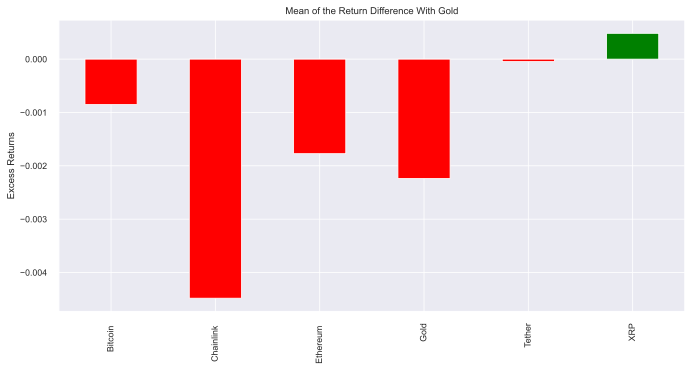

In [53]:
#setting fig size 
rcParams['figure.figsize'] = 10, 5
#setting up colours for graphs
COLORS = ['red', 'red', 'red', 'red', 'red', 'green']

# calculate the mean of gold_excess_returns by getting the .mean()
g_avg_excess_return = g_excess_returns.mean()

# plotting gold_avg_excess_returns to visually see the data
g_avg_excess_return.plot.bar(title='Mean of the Return Difference With Gold',ylabel ="Excess Returns",color = COLORS);

### Analyzing the Data set 
<p>This shows us visually the mean daily return differnce for cryptocurrencies vs gold. You can see that XRP is the only cryptocurreny in the green. To me this explains that XRP, Tether,Bitcoin, and Ethereum are more likely to show higher returns in investment then gold stocks which is not surprising to me as cryptocurrency is shown to yield a higher daily return.</p>

### The Sharpe Mathod:
<p> I can now start applying the Sharpe Ratio. I need to calculate the average of the Cryptocurrency excess returns. According the Sharpe ratio this will explain how much more or less the Cryptocurrency investment yields per day compared to the S&P Benchmark that is common in comparing stocks.</P>

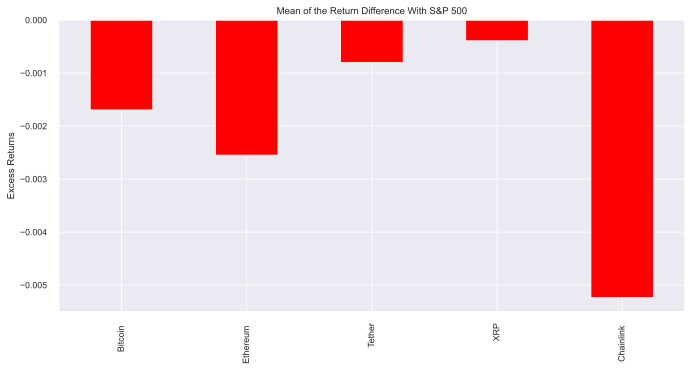

In [54]:
#setting fig size 
rcParams['figure.figsize'] = 10, 5
#setting up colours for graphs
COLORS = ['red', 'red', 'red', 'red', 'red']

# calculate the mean of cryptocurrencies to S&P 500 by avg_excess_returns by getting the .mean()
avg_excess_return = excess_returns.mean()

# plotting cryptocurrencies to S&P 500 avg_excess_returns to visually see the data
avg_excess_return.plot.bar(title='Mean of the Return Difference With S&P 500',ylabel ="Excess Returns",color = COLORS);

### Analyzing the Data set 

<p>This shows us visually the mean daily return differnce for cryptocurrencies vs S&P. You can see that XRP is the only cryptocurreny in the red now. To me this explains that all 5 are less likely for your return investment to be in the positives compared to the S&P benchmark portfolio, however you can clearly see that XRP is the most likely to daily return close to the S&P benchmark data.</p>
<p>It looks like there was quite a bit of a difference between average daily returns for XRP and Chainlink.<p>

### The Sharpe Method:
<p> The next step is for us to find the standard deviation of the gold excess returns. According to Sharpe this will show us the amount of risk an incestment in the stock implies as compared to an investment in the Gold stock. We are going to do this in one easy step by getting the .std() which is another built in method to python</p>

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}, ylabel='Risk '>

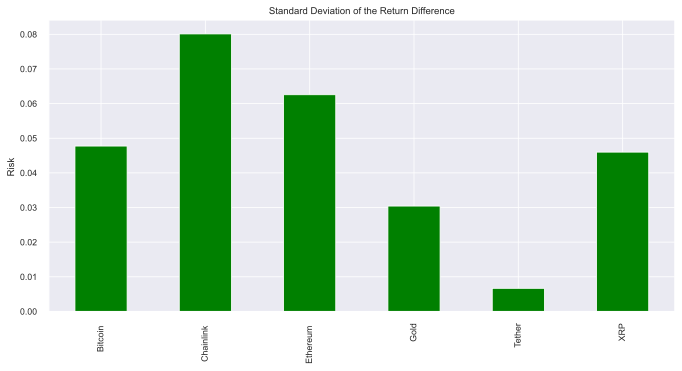

In [55]:
#setting up the fig size
rcParams['figure.figsize'] = 10, 5
#setting up the colours for the graph
COLORS = ['green', 'green', 'green', 'green', 'green', 'green']

# calculate the standard deviations for gold stock
g_sd_excess_return = g_excess_returns.std()

# plotting the standard deviations for gold stock compared to cryptocurrencies                     
g_sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference',ylabel ="Risk ",color = COLORS)

### Analyzing the Data set 

<p>This shows us visually the standard deviation of the return differnce for cryptocurrencies vs Gold. You can see that Tether is lower in risk and Chainlink is the highest in risk. To me this explains that all 4  out of the 5 are a higher risk then investing in gold stocks and you are less likely for your return investment to be in the positives compared to gold, however you can clearly see that Tether is less risk.</p>

### The Sharpe Method:
<p> The next step is for us to find the standard deviation of the S&P 500 excess returns. According to Sharpe this will show us the amount of risk an incestment in the stock implies as compared to an investment in the S&P stocks. We are going to do this in one easy step by getting the .std() which is a built in method to python</p>

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}, ylabel='Risk '>

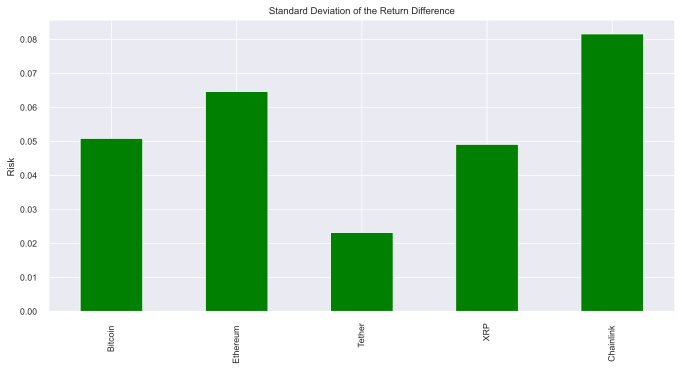

In [56]:
#setting up the fig size
rcParams['figure.figsize'] = 10, 5
#setting up the colours for the graph
COLORS = ['green', 'green', 'green', 'green', 'green']


# calculate the standard deviations for S&P 500 stock
sd_excess_return = excess_returns.std()

# plotting the standard deviations for S&P 500 stock compared to cryptocurrencies                    
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference',ylabel ="Risk ",color = COLORS)

### Analyzing the Data set 

<p>This shows us visually the standard deviation of the return differnce for cryptocurrencies vs S&P. You can see that Tether is lower again in risk and Chainlink is agin the highest in risk. To me this explains that  4  out of the 5 are a higher risk then investing in S&P stocks and you are less likely for your return investment to be in the positives compared to S&P benchmark, however you can clearly see that Tether is a lower risk then the rest of them.</p>

### Sharpe Method: Final step
<p> The final step is to now put this all together and mathimaticaly compute the ratio of gold and S&P 500 average excess returns and the gold and S&P 500 standard diviation of excess returns. According to Sharpe this will finally show the Sharpe ratio and show us how much more or less of a return on the investment yeilds per unit of risk. </p>

<p/>According to Sharpe: In order to do this the Sharpe Ratio is annualized by multiplying it by the square root of the number of periods. That means we have to use the daily data as the input, in order to use the square root of the number of trading days(5 days, 52 weeks, minus a few holidays): √252. 

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Crypto vs Gold'}, ylabel='Potential Return on Investment'>

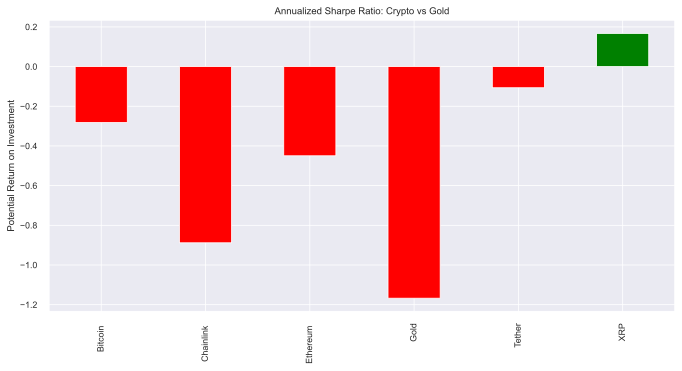

In [57]:
#setting up the fig size
rcParams['figure.figsize'] = 10, 5
#setting up the colours for the graph
COLORS = ['red', 'red', 'red', 'red', 'red', 'Green']

# calculate the daily gold sharpe ratio by division of the avg excess return to the sd excess return
g_daily_sharpe_ratio = g_avg_excess_return.div(g_sd_excess_return)

# annualize the sharpe ratio from the gold stocks
g_annual_factor = np.sqrt(252)
g_annual_sharpe_ratio = g_daily_sharpe_ratio.mul(g_annual_factor)

# plot the annualized sharpe ratio from gold stocks
g_annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Crypto vs Gold', ylabel ="Potential Return on Investment",color = COLORS)

### Analyzing the Data set 

<p>This shows us visually the annualized sharpe ratio for Cryptocurrencies vs Gold. You can see that XRP is again the only one in the green and has the highest rate potential for return. To me this explains that  all 5 are a higher potential of retrun on investment then gold stocks, however you can clearly see that XRP is a higher then the rest of them.</p>

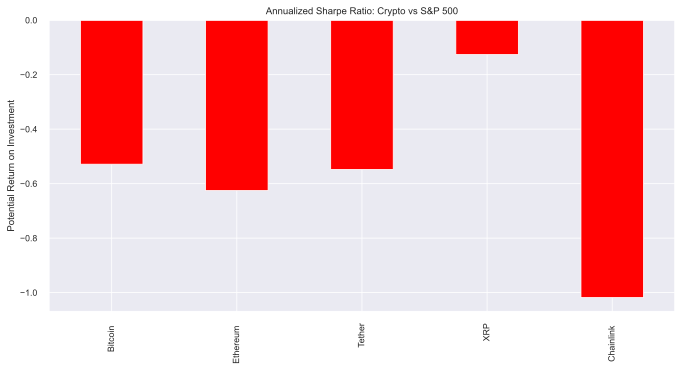

In [58]:
rcParams['figure.figsize'] = 10, 5

COLORS = ['red', 'red', 'red', 'red', 'red']

# calculate the daily sharpe ratio from S&P stocks
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio from S&P stocks
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plotting the annualized sharpe ratio from S&P 500 stocks
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Crypto vs S&P 500',ylabel ="Potential Return on Investment",color = COLORS);

### Analyzing the Data set 

<p>This shows us visually the annualized sharpe ratio for Cryptocurrencies vs S&P. You can see that XRP is again the lowest in the red and has some potential for return against S&P. To me this explains that  all 5 are a low potential of retrun on investment then S&P stocks, and it clearifies that its hard to compare cryptocurrencies to normal stocks. Investors are right in the fact that cryptocurrencies are much more comparable to commodities then anything else on the market.</p>

## Conclusion
<p>The first thing I wanted to figure out was how volatile were the cryptocurrencies on the market and which ones were the most volatile? I found that none of the major ones showed up as being volatile. Infact, most of the ones that showed up were ones I never even heard of. Then I wanted to take the top 5 cryptocurrencies and find out how they compare as an investment option to other stocks on the market. Because investors say that cryptocurrencies are not really comparable due to their volatility they recommend that it is closest to gold stocks. So I wanted to see if that was true and how to measure that in the aspect of investment.

After looking through all the graphs you will see in the graphs below “The inputs for the Sharpe Ratio: Starting with Daily Cryptocurrency Stock Returns” that all the Cryptocurrency stocks went up right around mid March when COVID-19 hit the world hard. Then if you look at “Daily Gold stock returns” just below the last one you will see that gold did the same thing. I have invested in gold stocks for 10 years now and the reason for that is that when the economy takes a hit everyone gets scared and invests their money in gold stocks. This was the same thing that happened in 2008 gold started to skyrocket while other stocks took a big hit. So this tells me that the investors are right that Cryptocurrency reacts much like gold in the stock market. 

I wanted to also compare it to the S&amp;P 500 to make sure that it wasn’t comparable in measuring the risk to reward. After doing that you will see that in the graphs only negatives verses the one above it comparing it to gold, you will see one positive Cryptocurrency. This tells me that even though the top 4 Cryptocurrencies fall in the same category as the S&amp;P 500 but they are just to volatile in nature to show consistent investment returns. 

This means that an investment in XRP would be comparable to investing in gold stocks at the moment. Sharpe mehtod explains in the risk-adjusted terms, the investment in XRP would have been more appealing then investing in gold stocks. This difference however is explained by the differences in return rather than the higher risk between Gold and XRP. The risk of choosing XRP over Gold (as measured by the standard deviation) was only a bit higher. The higher Sharpe ratio for XRP ends up higher due to the higher average daily returns for XRP compared to gold.

The big reason you want to compare stocks to others in the stock market is to find out which one yeilds the best return. However, in order to do that we have to make sure we are comparing "apples to apples". The S&P 500 is not a comparable but Gold stocks are and that is a good benchmark when your looking at investing in and comparing Cryptocurrencies.</P.

In [ ]:
# Uncomment which cryptocurrancy you would invest in.
#buy_bitcoin= True
#buy_Ethereum= True
#buy_Tether= True
#buy_XRP= True
#buy_Chainlink= True